Lets Start this as a Binary Classifier: Does Patient has Disease "X" based on Symptoms {"y"}

In [70]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load file
dataset = pd.read_csv(r"./Dataset/dataset.csv")

In [71]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  


# apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)

    
#check the output
dataset.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#we now will make the checklist of all symptoms
#List of symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
#create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)

Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

In [73]:
# Assume you want to keep the original disease/diagnosis column
#Each unique symptom becomes column, instead of writing symptom names, we have 1 if patient has the syptom and 0 if not


binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check ecah row
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
#so what we basically did : For each symptom in your list, check every patient.Mark 1 if the patient has this symptom anywhere, or 0 if not

#check the 
print(binary['itching'])

#make_fungal_infection == 1 and else 0



#binary['Disease'] = np.where(binary[unique_symptoms[0]] == binary[unique_symptoms[0]], 1, 0) #if the patient has a fungal infection, we mark it as 1, else 0

binary.head(5)

C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

0       1
1       0
2       1
3       1
4       1
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: itching, Length: 4920, dtype: int64


C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_800\1381640604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Prepare the data

#binary = binary.head(1000)  # Sample 10% of the data for faster processing

X_binary = binary.drop(columns=['Disease'])  # All columns except Disease
y_binary = binary['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

print(y_test_bin.head(5))  # Check the test set

# Create and train the Decision Tree model
dt_model_binary = DecisionTreeClassifier(random_state=42)  # You can adjust max_depth as needed

max_depth_range = range(1, 101)  # Example range for max_depth

acc_scores = []
for max_depth_ in max_depth_range:
    dt_model_binary = DecisionTreeClassifier(max_depth=max_depth_, random_state=42)
    dt_model_binary.fit(X_train_bin, y_train_bin)
    y_pred_bin = dt_model_binary.predict(X_test_bin)
    accuracy_binary = accuracy_score(y_test_bin, y_pred_bin)
    acc_scores.append(accuracy_binary)

plt.figure()
plt.plot(max_depth_range,acc_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()



feat_imp = dt_model_binary.feature_importances_



tup = list(zip(binary.columns.tolist()[1:], feat_imp))  # Create a list of tuples (feature, importance)
tup = sorted(tup, key=lambda x: x[1], reverse=True)  # Sort the tuples by importance


plt.barh(range(5),[item[1] for item in tup[0:5]])
plt.yticks(range(5),[item[0] for item in tup[0:5]])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)




NameError: name 'binary' is not defined

373                    Acne
4916                   Acne
1550        Hyperthyroidism
3081                   AIDS
3857    Chronic cholestasis
Name: Disease, dtype: object
{'max_depth': 65, 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0


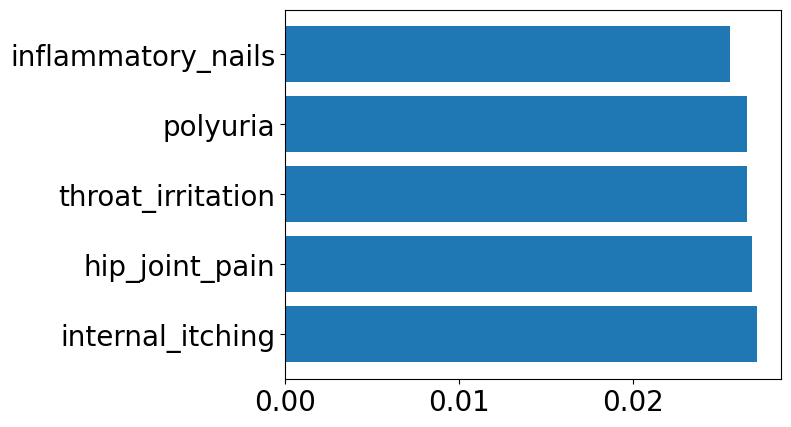

In [76]:
from sklearn.model_selection import GridSearchCV

X_binary = binary.drop(columns=['Disease'])  # All columns except Disease
y_binary = binary['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.35, random_state=42)

print(y_test_bin.head(5))  # Check the test set

# Create and train the Decision Tree model
dt_model_binary = DecisionTreeClassifier(random_state=42)  # You can adjust max_depth as needed

max_depth_range = range(40, 80,5)  # Example range for max_depth
min_samples_split_range = range(2, 4)  # Example range for min_samples_split
min_samples_leaf_range = range(1, 4)  # Example range for min_samples_split

param_grid = {'max_depth': max_depth_range,'min_samples_split': min_samples_split_range, 'min_samples_leaf': min_samples_leaf_range}
grid = GridSearchCV(dt_model_binary, param_grid, cv=10)
grid.fit(X_train_bin, y_train_bin)
print(grid.best_params_)
print(grid.score(X_test_bin, y_test_bin))



dt_model_binary = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'], min_samples_leaf=grid.best_params_['min_samples_leaf'], random_state=42)
dt_model_binary.fit(X_train_bin, y_train_bin)

feat_imp = dt_model_binary.feature_importances_



tup = list(zip(binary.columns.tolist()[1:], feat_imp))  # Create a list of tuples (feature, importance)
tup = sorted(tup, key=lambda x: x[1], reverse=True)  # Sort the tuples by importance


plt.barh(range(5),[item[1] for item in tup[0:5]])
plt.yticks(range(5),[item[0] for item in tup[0:5]])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)



{'max_depth': 17, 'n_estimators': 15}
0.9959349593495935


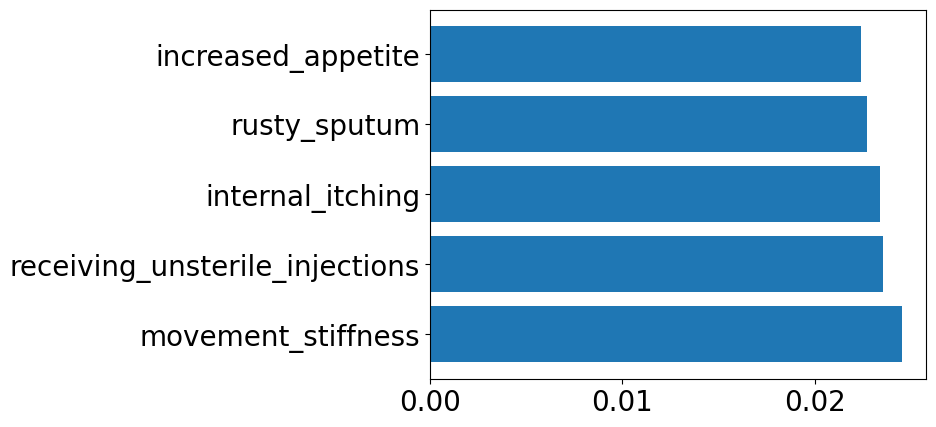

In [80]:
from sklearn.ensemble import RandomForestClassifier

#binary = binary.sample(frac = 0.9)  # Sample 10% of the data for faster processing

X_binary = binary.drop(columns=['Disease'])  # All columns except Disease
y_binary = binary['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

rf_reg = RandomForestClassifier(random_state=42)

n_estimators_range = range(1, 20, 2)  # Example range for n_estimators
max_depth_range = range(5, 50, 2)  # Example range for max_depth


param_grid = {'n_estimators':n_estimators_range,'max_depth': max_depth_range}
grid = GridSearchCV(rf_reg, param_grid, cv=10)
grid.fit(X_train_bin, y_train_bin)
print(grid.best_params_)
print(grid.score(X_test_bin, y_test_bin))



rf_reg = RandomForestClassifier(n_estimators= grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'],random_state=42)
rf_reg.fit(X_train_bin, y_train_bin)

feat_imp = rf_reg.feature_importances_



tup = list(zip(binary.columns.tolist()[1:], feat_imp))  # Create a list of tuples (feature, importance)
tup = sorted(tup, key=lambda x: x[1], reverse=True)  # Sort the tuples by importance


plt.barh(range(5),[item[1] for item in tup[0:5]])
plt.yticks(range(5),[item[0] for item in tup[0:5]])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)